# Name : LeNet_MNIST.ipynb
LeNet Arcitecture for MNIST Dataset Classification

In [ ]:
from tensorflow.keras.datasets.mnist import load_data


# Load Dataset

In [ ]:
(TrainX,TrainY),(TestX,TestY) = load_data()

Summarize Loaded Dataset

In [ ]:
print('Train: X=%s, y=%s' %(TrainX.shape, TrainY.shape))
print('Test: X=%s, y=%s' %(TestX.shape, TestY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


# Preprocessing


1.   Normalization

2.   Reshape data

3.   Validation Data


In [ ]:
#Normalization
from numpy import asarray
TrainX = TrainX.astype('float32')/255
TestX = TestX.astype('float32')/255

In [ ]:
#Reshape data
TrainX = TrainX.reshape((TrainX.shape[0], TrainX.shape[1], TrainX.shape[2],1))
TestX = TestX.reshape((TestX.shape[0], TestX.shape[1], TestX.shape[2],1))

In [ ]:
#Validation Data
val_x = TrainX[:5000]
val_y = TrainY[:5000]


# Import Layers

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten

# Step 1 :Define the model

In [ ]:
input_shape = TrainX[0].shape
print(input_shape)
LeNet_5 = Sequential()
LeNet_5.add((Conv2D(6, (5,5), strides=1, activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1))))
LeNet_5.add(AveragePooling2D(2,2))
LeNet_5.add((Conv2D(16, (5,5), strides=1, activation='tanh', kernel_initializer='he_uniform', padding='valid' )))
LeNet_5.add(AveragePooling2D(2,2))
LeNet_5.add((Conv2D(120, (5,5), strides=1, activation='tanh', kernel_initializer='he_uniform', padding='valid')))
LeNet_5.add(Flatten())
LeNet_5.add(Dense(120, activation='tanh'))
LeNet_5.add(Dense(84, activation='tanh'))
LeNet_5.add(Dense(10, activation='softmax'))


(28, 28, 1)


# Step2 : Compile The Model

In [ ]:
LeNet_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

# Step3 : Fit the model

In [ ]:
from traitlets import validate
history=LeNet_5.fit(TrainX, TrainY, epochs=15, validation_data=(val_x, val_y))

Epoch 1/15
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2042 - accuracy: 0.9384 - val_loss: 0.0888 - val_accuracy: 0.9748
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0786 - accuracy: 0.9755 - val_loss: 0.0525 - val_accuracy: 0.9844
Epoch 3/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0338 - val_accuracy: 0.9904
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0265 - val_accuracy: 0.9914
Epoch 6/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0199 - val_accuracy: 0.9938
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0207 - val_accuracy

# Step4 :Evaluate the model

In [ ]:
Loss, acc =LeNet_5.evaluate(TestX, TestY)
print('Accuracy: ', acc*100)
print('Loss: ', Loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0424 - accuracy: 0.9889
Accuracy:  98.89000058174133
Loss:  0.042361967265605927


# LetNet Model Summary

In [ ]:
LeNet_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

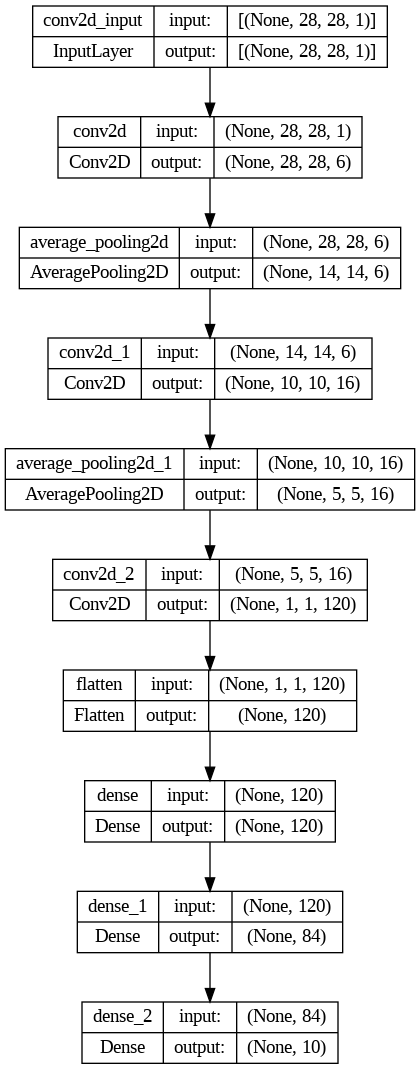

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(LeNet_5, 'model.png', show_shapes=True)

# Plot Learning Curves

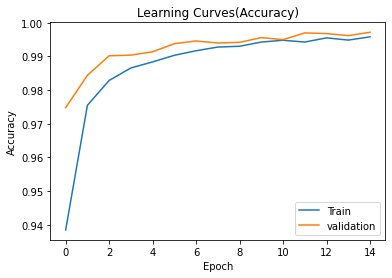

In [ ]:
import matplotlib.pyplot as plt
plt.title('Learning Curves(Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()


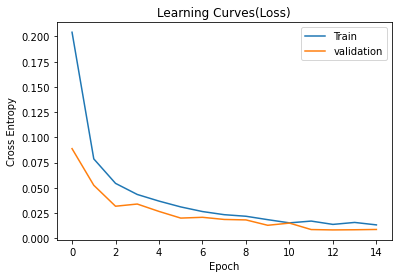

In [ ]:
import matplotlib.pyplot as plt
plt.title('Learning Curves(Loss)')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()